In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_geneder = pd.read_csv('corrected_data.csv')
data_geneder


,Gender,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
2,F,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
3,F,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
4,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
...,...,...,...,...,...,...,...,...,...
2864,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
2865,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
2866,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
2867,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


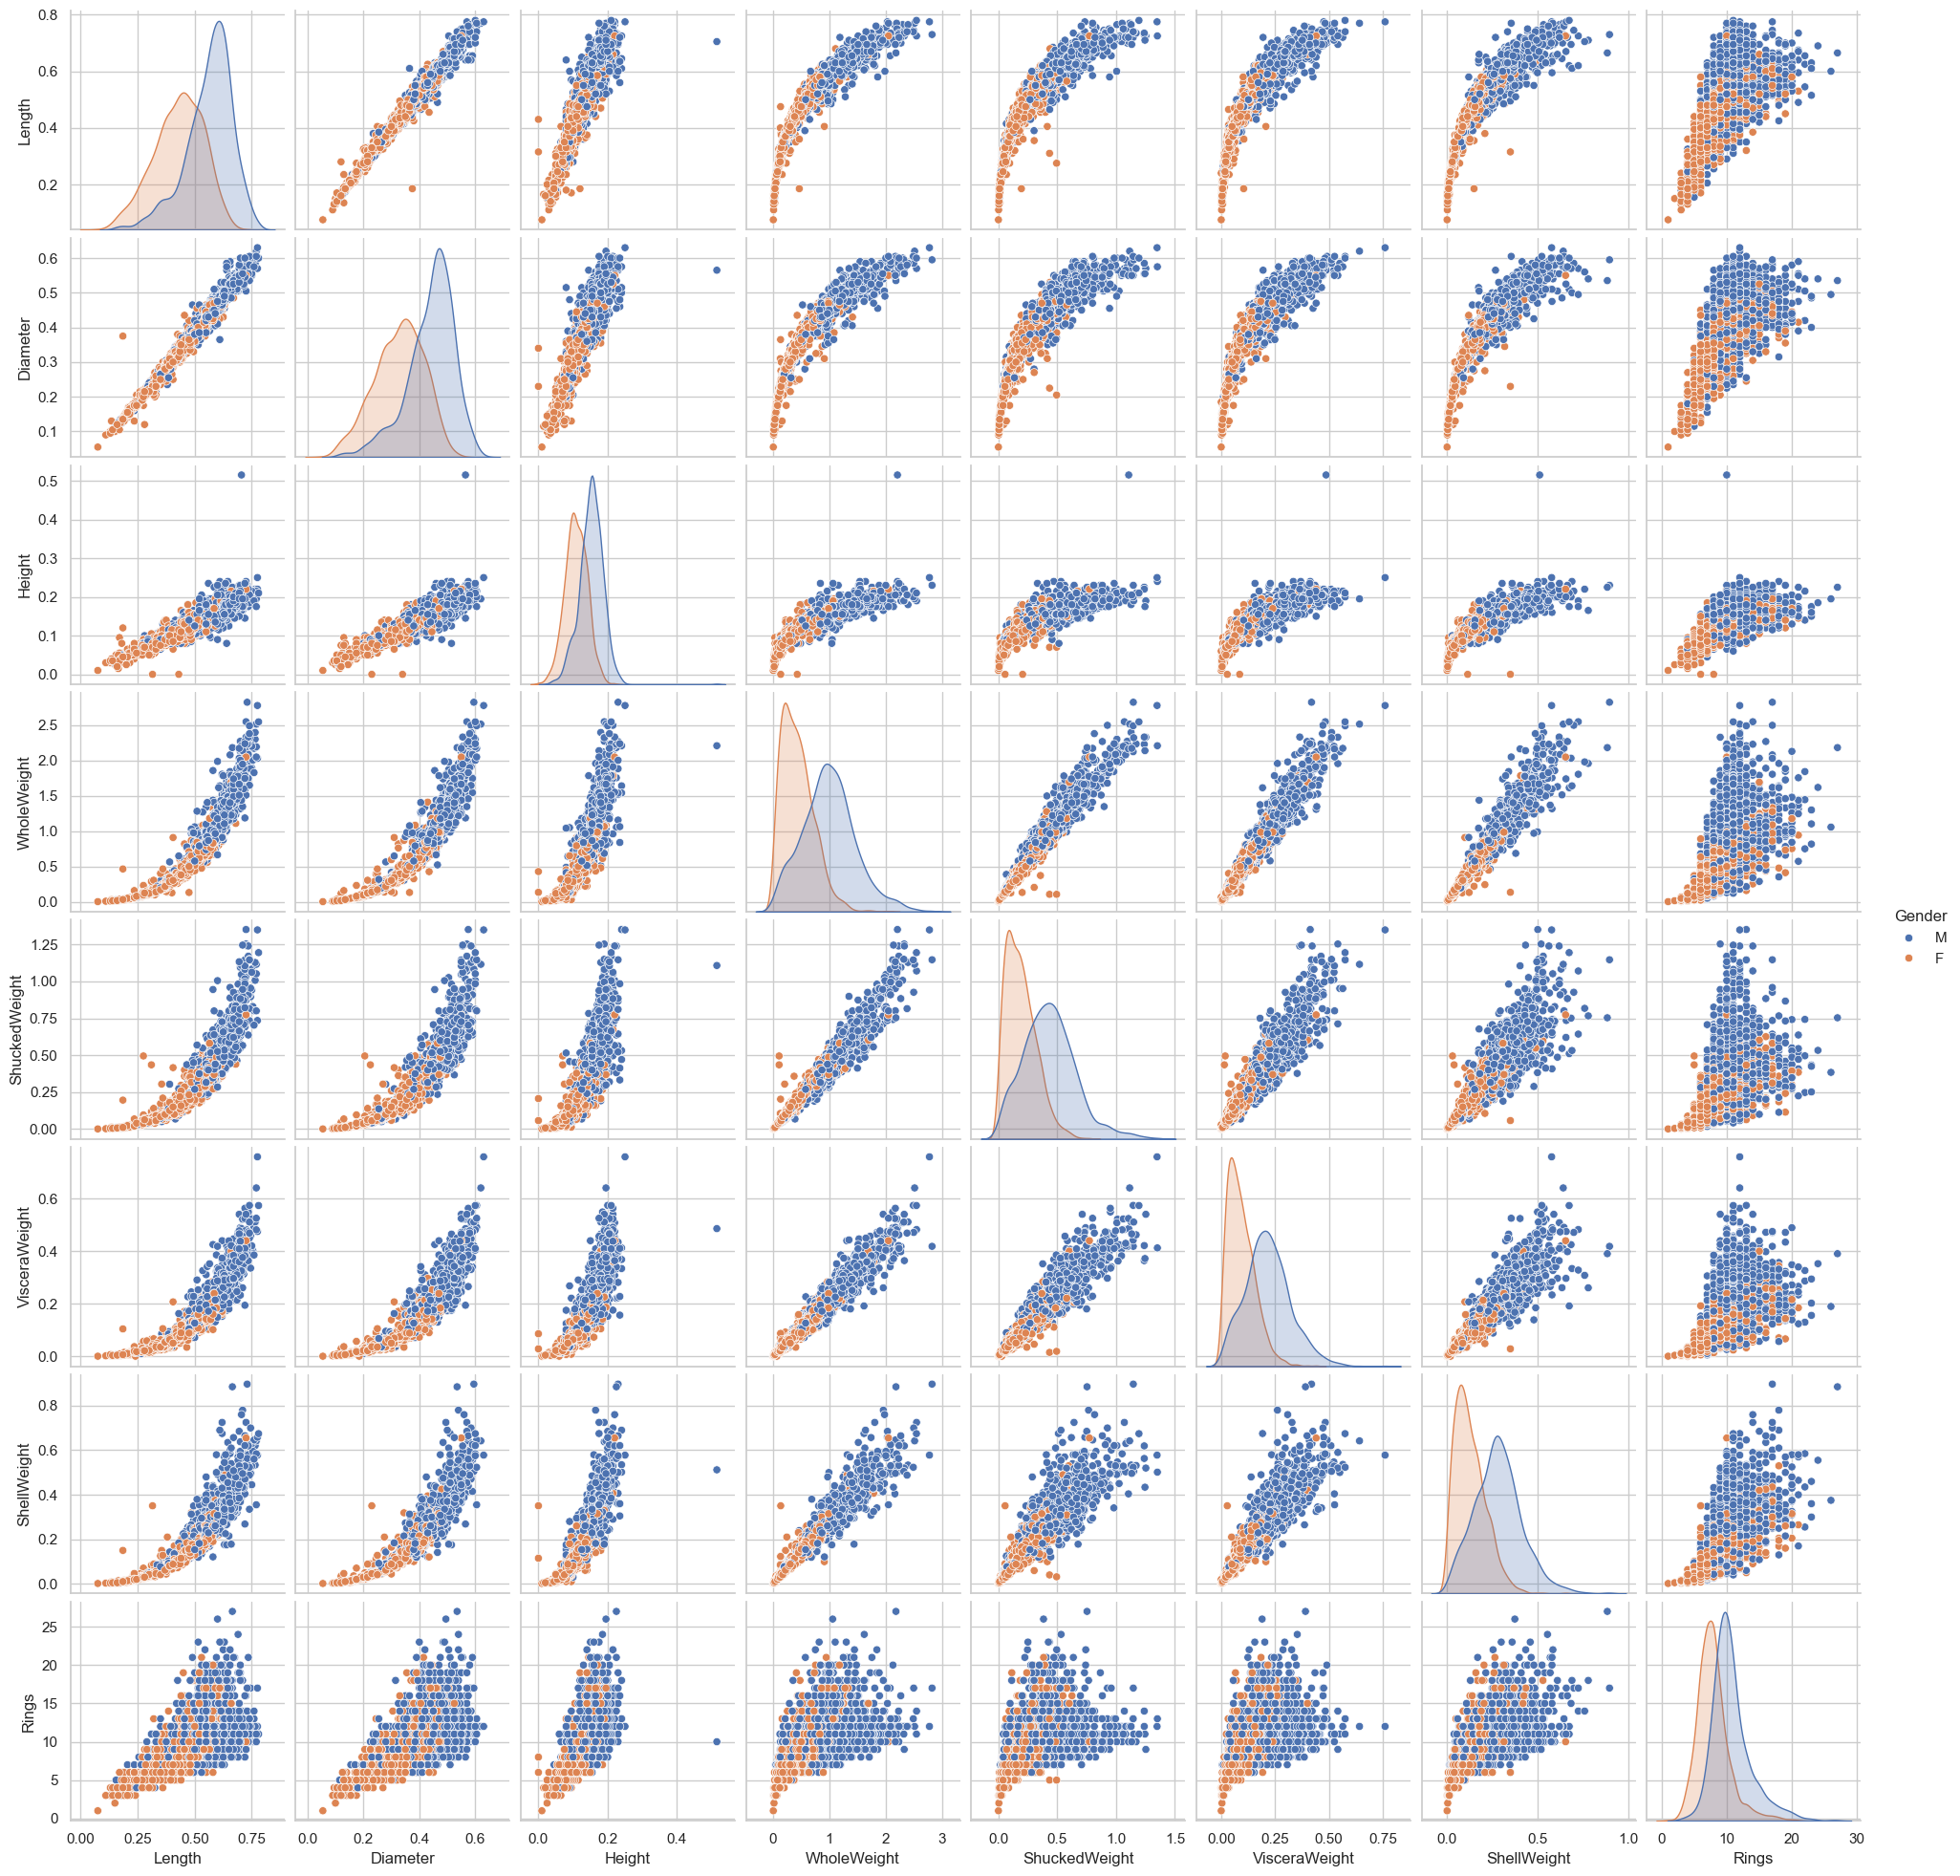

In [4]:
sns.pairplot(data_geneder, hue='Gender')

<Axes: xlabel='Diameter', ylabel='ShuckedWeight'>

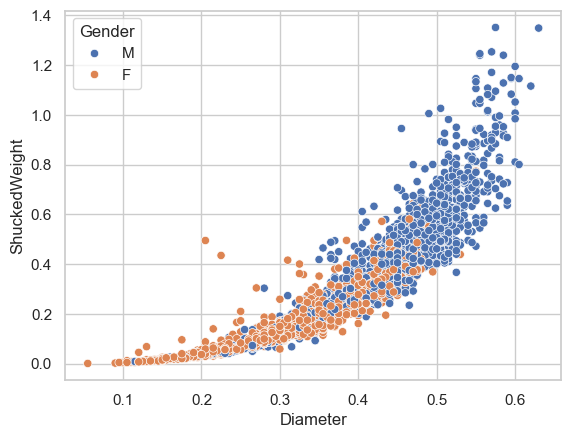

In [ ]:
sns.scatterplot(x='Diameter', y='ShuckedWeight', data=data_geneder, hue='Gender')

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = data_geneder[['Diameter', 'ShuckedWeight']]
y = data_geneder['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [4]:
# save the model
import joblib
joblib.dump(knn_model, 'gender_model.pkl')

['gender_model.pkl']

In [5]:
knn_model.predict([[0.097, 0.05]])

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['F'], dtype=object)